# Fourier Series

The purpose of this github page is to demonstrate fourier series representations and how they compare to analytical solutions. The code is intended for those who have knowledge of Calculus and are interested to see how fourier series calculations can be performed and seen in python! 

In [2]:
import sympy as sp
sp.init_session()

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



## Demonstrating that the Inner Product of Certain Functions are Zero

When we use Euclidian vectors *i, j* and*k* for physical problems, we can get the sense of the meaning behind orthogonality and how vectors in a vector space are related to eachother. In calculating the dot product of two vectors, we multiply components with the same index (*i, j* or *k*) and sum them all together. We can tell whether or not the vectors are orthogonal. If the dot product is 0, the vectors are orthogonal.

However, this summation does not work with complex vectors. So, we can generalize the dot product to the inner product of two functions, which gives how much one function is projected onto another. When the functions are real, the inner product is no different than the dot product. The inner product multiplies values at the same x-position and summing, like the dot product. With infinitely many x values, the summing becomes an integral. Essentially, to calculate an inner product for functions, we take the complex conjugate of the first function, multipy the two functions, and then integrate the product function. When this inner product is equal to 0, the two functions are said to be orthogonal (analogous to use the dot product for vectors). When functions are orthogonal, they form a function space that can be used to approximate other functions.

Luckily, we can write simple python code to calculate the inner product for us! We can simply use *sp.integrate* to multiply the two functions sin(4x) and cos(x), then integrate them with respect to x over the interval 0 to 2pi. The result is 0, showing that those two functions are orthogonal. 

In [4]:
sp.integrate(sp.sin(4*x)*sp.cos(1*x), (x, 0, sp.pi*2))

## Series for a Sawtooth Wave of a Piecewise Function

Even discontinious periodic functions, such as the piecewise function we will use in our example, can be written as an infinite sequence of cosine and sine functions with the Fourier Series. Since an infinite sequence is not possible, we sue this sequence of cosine and sine functions to __approximate__ the original, in our case piece-wise, function. The more terms from the infinitie sequence we include in the approximation, the more accurate the approximation will be to the original function. 

To visualize this, we make our original function *myAwesomeFunction* with two parts. Given that *x* is the imput for the functions, *myAwesomeFunction1* is the part of the piece wise function whose result is x - 2pi on the interval pi to 2pi. *myAwesomeFunction2* is the part of the piece wise function whose result is x on the interval 0 to pi. These functions are the original functions that we will use Fourier Series to approximate. We then define a function *fsMyFunc* and *fsMyFunc2* to return the Fourier Series approximation of *myAwesomeFunction1* and *myAwesomeFunction2* respectively. To calculate that Fourier series, we can use the simple *sympy* command, *sp.fourier_series.* 

To visualize the fourier series approximation relative to the original piece-wise function, we set up another function called *plotMyFunc.* Here, *p1* is the plot of the fourier series approximation of *myAwesomeFunction1* on the interval pi to 2pi while *p2* is graph of *myAwesomeFunction1* on the same interval. *p3* is the graph of *myAwesomeFunction2* on the interval 0 to pi and *p4* is the graph of its fourier series approximation on the same interval. 

We then append *p2* so that it contains the first value in *p1* and ensure that the approximation accurately approximates the function by "resting on top" of the original function. Additionally, we use *.extend* to include the graphs of *p3* and *p4* in the graph produced and use *.show* to actually see the graphs. 

In [6]:
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [21]:
sp.init_printing()

x = sp.symbols('x')

def myAwesomeFunction1(x):
    a = x - 2*sp.pi
    return a
def myAwesomeFunction2(x):
    a = x
    return a

def fsMyFunc(terms, var):
    return sp.fourier_series(myAwesomeFunction1(var), (var, sp.pi, 2*sp.pi)).truncate(n=terms)

def fsMyFunc2(terms, var):
    return sp.fourier_series(myAwesomeFunction2(var), (var, 0, sp.pi)).truncate(n=terms)

def plotMyFunc(terms):
    p1 = sp.plot(fsMyFunc(terms,x),(x,sp.pi, 2*sp.pi), show=False, line_color='m')
    p2 = sp.plot(myAwesomeFunction1(x), (x,sp.pi,2*sp.pi), show=False, line_color='b') 
    p3 = sp.plot(myAwesomeFunction2(x), (x,0,sp.pi), show=False, line_color='b') 
    p4 = sp.plot(fsMyFunc2(terms,x),(x,0,sp.pi), show=False, line_color='m')
    p2.append(p1[0])
    p2.extend(p3)
    p2.extend(p4)
    p2.show()
    return None

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = 8, 6

We have the following to adjust the number of terms we want to approximate to! As we can see by adjusting this, the more terms, the more accurate the approximation is. 

In [22]:
interact(plotMyFunc, terms=(1,10,1));

interactive(children=(IntSlider(value=5, description='terms', max=10, min=1), Output()), _dom_classes=('widget…

## Another Fourier Series Example and Generating a Sawtooth Wave

This is another example of taking the fourier series of a function and generating a sawtooth way to see how well the approximation approximates the original function. In this case, our original function is y = 2^x. Below, we see the first few terms when getting the fourier series approximation of this function. 

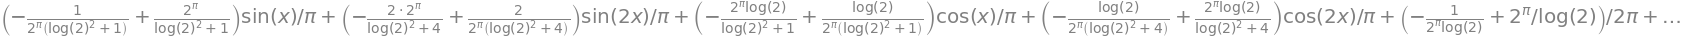

In [24]:
sp.fourier_series(2**x)

Next, we take the same approach that we had before: constructing a function for the original function (titled *myAwesomeFunction3*),constructing a function for calculating the fourier series (titled *fsMyFunc3*), and then a final function for plotting those two graphs on the interval -5 to 5. 

In [29]:
sp.init_printing()

def myAwesomeFunction3(x):
    y = 2**x
    return y

def fsMyFunc3(terms, var):
    return sp.fourier_series(myAwesomeFunction3(x), (var, -5, 5)).truncate(n=terms)

def plotMyFunc2(terms):
    p5 = sp.plot(fsMyFunc3(terms,x),(x,-5,5), show=False, line_color='g')
    p6 = sp.plot(myAwesomeFunction3(x), (x,-5,5), show=False, line_color='black')
    p6.extend(p5)
    p6.show()

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = 8, 6

Just like in the last example, we have the following to adjust the number of terms we want to approximate to. As we can see by adjusting this, the more terms, the more accurate the approximation is. 

In [30]:
interact(plotMyFunc2, terms=(1,10,1));

interactive(children=(IntSlider(value=5, description='terms', max=10, min=1), Output()), _dom_classes=('widget…

## References
* https://stackoverflow.com/questions/19932072/plotting-2-or-more-functions-in-the-same-graph
* https://stackoverflow.com/questions/50782952/fourier-series-of-piecewise-python
* http://www.eng.fsu.edu/~dommelen/quantum/style_a/dot.html#:~:text=The%20dot%20product%20of%20vectors,and%20taking%20the%20square%20root.&text=In%20this%20subsection%2C%20the%20dot,for%20complex%20vectors%20and%20functions.
* https://kconrad.math.uconn.edu/math1132s10/sawtooth.html